In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../../')
!pwd

/home/giorgioseveri/projects/advml/lemon


In [3]:
dist_type = ['1', '2', 'inf', 'cos']
human_dist = {'1': 'L-1', '2': 'L-2', 'inf': 'L-inf', 'cos': 'Cosine'}
victim_model = 'densenet161'
proxies = [
    'vgg11_bn',
    'vgg13_bn',
    'vgg16_bn',
    'vgg19_bn',
    'resnet18',
    'resnet34',
    'resnet50',
    'densenet121',
    'densenet169',
    'mobilenet_v2',
    'googlenet',
    'inception_v3'
]
proxies = sorted(proxies)

In [4]:
distances = np.load(
    'results/distances_v_densenet161_p_densenet121_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy',
    allow_pickle=True
).item()
print(distances)

{'densenet121': array([1.96612476e+03, 2.82449207e+01, 2.52590132e+00, 1.40515983e-01]), 'densenet169': array([2.06990967e+03, 2.86825314e+01, 2.47830868e+00, 1.45893633e-01]), 'googlenet': array([3.03888135e+03, 4.14581871e+01, 4.07598114e+00, 2.90385365e-01]), 'inception_v3': array([2.57898657e+03, 3.68407211e+01, 3.72800684e+00, 2.32471168e-01]), 'mobilenet_v2': array([2.44948633e+03, 3.35231857e+01, 3.23099184e+00, 2.10624337e-01]), 'resnet18': array([2.58950366e+03, 3.33723831e+01, 3.02159691e+00, 1.80937469e-01]), 'resnet34': array([2.53413770e+03, 3.32941208e+01, 3.68030453e+00, 1.72077835e-01]), 'resnet50': array([2.39638965e+03, 3.25622787e+01, 3.06440854e+00, 1.60894632e-01]), 'vgg11_bn': array([4.11289209e+03, 4.80049286e+01, 3.67372131e+00, 2.86220431e-01]), 'vgg13_bn': array([3.98184546e+03, 4.69382019e+01, 3.51297927e+00, 2.78246462e-01]), 'vgg16_bn': array([4.12149121e+03, 4.91337700e+01, 4.18421650e+00, 2.88083375e-01]), 'vgg19_bn': array([5.03814160e+03, 6.04839783e+01

In [5]:
transf_densenet121 = 0.42000000000000004
transf_densenet169 = 0.52
transf_googlenet = 0.10999999999999999
transf_inception_v3 = 0.06999999999999995
transf_mobilenet_v2 = 0.22999999999999998
transf_resnet18 = 0.4
transf_resnet34 = 0.39
transf_resnet50 = 0.35
transf_vgg11_bn = 0.25
transf_vgg13_bn = 0.18999999999999995
transf_vgg16_bn = 0.12
transf_vgg19_bn = 0.08999999999999997
transfers = [
    transf_densenet121, transf_densenet169, transf_googlenet, transf_inception_v3,
    transf_mobilenet_v2, transf_resnet18, transf_resnet34, transf_resnet50,
    transf_vgg11_bn, transf_vgg13_bn, transf_vgg16_bn, transf_vgg19_bn
]

In [6]:
# Create a single dataframe containing all the results
results = []
for i, p in enumerate(proxies):
    res = {'victim': victim_model, 'proxy': p, 'transfer': transfers[i]}
    for j, d in enumerate(dist_type):
        res['dist_{}'.format(d)] = distances[p][j]
    results.append(res)
res_df = pd.DataFrame.from_dict(results) 

In [7]:
res_df

,victim,proxy,transfer,dist_1,dist_2,dist_inf,dist_cos
0,densenet161,densenet121,0.42,1966.124756,28.244921,2.525901,0.140516
1,densenet161,densenet169,0.52,2069.909668,28.682531,2.478309,0.145894
2,densenet161,googlenet,0.11,3038.881348,41.458187,4.075981,0.290385
3,densenet161,inception_v3,0.07,2578.986572,36.840721,3.728007,0.232471
4,densenet161,mobilenet_v2,0.23,2449.486328,33.523186,3.230992,0.210624
5,densenet161,resnet18,0.40,2589.503662,33.372383,3.021597,0.180937
6,densenet161,resnet34,0.39,2534.137695,33.294121,3.680305,0.172078
7,densenet161,resnet50,0.35,2396.389648,32.562279,3.064409,0.160895
8,densenet161,vgg11_bn,0.25,4112.892090,48.004929,3.673721,0.286220
9,densenet161,vgg13_bn,0.19,3981.845459,46.938202,3.512979,0.278246


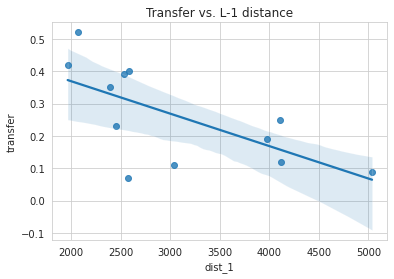

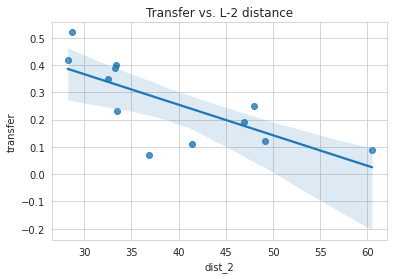

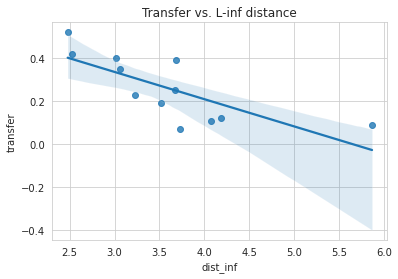

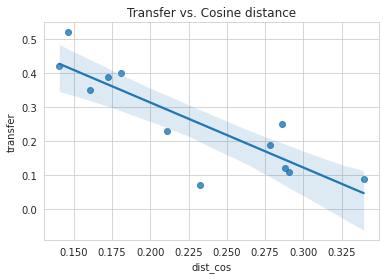

In [8]:
sns.set_style('whitegrid')

for d in dist_type:
    distance = 'dist_{}'.format(d)
    s = sns.regplot(data=res_df, y='transfer', x=distance)
    s.set(title='Transfer vs. {} distance'.format(human_dist[d]))
    plt.show()

In [9]:
res_df.corr(method='pearson')

,transfer,dist_1,dist_2,dist_inf,dist_cos
transfer,1.000000,-0.655016,-0.732705,-0.754815,-0.857316
dist_1,-0.655016,1.000000,0.989657,0.831848,0.914744
dist_2,-0.732705,0.989657,1.000000,0.888256,0.947327
dist_inf,-0.754815,0.831848,0.888256,1.000000,0.848954
dist_cos,-0.857316,0.914744,0.947327,0.848954,1.000000


## All distances
Let's now look at the distances between all model pairs

In [10]:
all_dist = np.load('results/distances_all_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy', allow_pickle=True)
all_dist = all_dist.item()

In [13]:
all_dist_inf = {k: v[2] for k, v in all_dist.items()}
all_dist_cos = {k: v[3] for k, v in all_dist.items()}

In [20]:
def inn_inf(v):
    return {i: j[2] for i,j in v.items()}
def inn_cos(v):
    return {i: j[3] for i,j in v.items()}
all_dist_inf = {k: inn_inf(v) for k, v in all_dist.items()}
all_dist_cos = {k: inn_cos(v) for k, v in all_dist.items()}

In [21]:
all_inf_df = pd.DataFrame.from_dict(all_dist_inf)
all_cos_df = pd.DataFrame.from_dict(all_dist_cos)

In [25]:
all_inf_df = all_inf_df.sort_index()
all_cos_df = all_cos_df.sort_index()

In [38]:
both_df = pd.concat([all_inf_df, all_cos_df], keys=["L-inf", "Cosine"])
both_df

densenet121  densenet161  densenet169  googlenet  \
L-inf  densenet121           NaN     2.525901     4.595985   3.663220   
       densenet161      2.525901          NaN     2.478309   4.075981   
       densenet169      4.595985     2.478309          NaN   4.290766   
       googlenet        3.663220     4.075981     4.290766        NaN   
       inception_v3     3.566700     3.728007     3.474990   3.657510   
       mobilenet_v2     2.864994     3.230992     4.146495   3.607444   
       resnet18         3.143457     3.021597     2.669463   5.144749   
       resnet34         2.564897     3.680305     2.961041   4.868105   
       resnet50         2.910314     3.064409     2.403894   3.763094   
       vgg11_bn         4.058463     3.673721     3.806016   4.266281   
       vgg13_bn         3.552438     3.512979     3.818011   3.564929   
       vgg16_bn         3.837358     4.184216     4.732772   3.945825   
       vgg19_bn         5.814536     5.868277     5.566589   5.478071   
Cosine densenet121           NaN     0.140516     0.140657   0.262255   
       densenet161      0.140516          NaN     0.145894   0.290385   
       densenet169      0.140657     0.145894          NaN   0.289072   
       googlenet        0.262255     0.290385     0.289072        NaN   
       inception_v3     0.228752     0.232471     0.244920   0.235526   
       mobilenet_v2     0.200567     0.210624     0.203609   0.247684   
       resnet18         0.179762     0.180937     0.190511   0.319228   
       resnet34         0.177072     0.172078     0.183017   0.329720   
       resnet50         0.145046     0.160895     0.144118   0.246204   
       vgg11_bn         0.284967     0.286220     0.308702   0.337148   
       vgg13_bn         0.266500     0.278246     0.290428   0.291561   
       vgg16_bn         0.283042     0.288083     0.296759   0.338978   
       vgg19_bn         0.335134     0.339398     0.342598   0.357960   

                     inception_v3  mobilenet_v2  resnet18  resnet34  resnet50  \
L-inf  densenet121       3.566700      2.864994  3.143457  2.564897  2.910314   
       densenet161       3.728007      3.230992  3.021597  3.680305  3.064409   
       densenet169       3.474990      4.146495  2.669463  2.961041  2.403894   
       googlenet         3.657510      3.607444  5.144749  4.868105  3.763094   
       inception_v3           NaN      3.299031  3.437768  3.506320  2.759015   
       mobilenet_v2      3.299031           NaN  3.681260  3.496836  2.602316   
       resnet18          3.437768      3.681260       NaN  2.890301  2.866427   
       resnet34          3.506320      3.496836  2.890301       NaN  3.356027   
       resnet50          2.759015      2.602316  2.866427  3.356027       NaN   
       vgg11_bn          2.916429      3.311952  3.452764  3.519012  3.319818   
       vgg13_bn          3.484251      3.503603  3.476038  3.403379  3.383454   
       vgg16_bn          3.704637      4.029752  3.766307  3.242556  3.613232   
       vgg19_bn          5.037509      5.286042  5.600904  5.311549  4.863159   
Cosine densenet121       0.228752      0.200567  0.179762  0.177072  0.145046   
       densenet161       0.232471      0.210624  0.180937  0.172078  0.160895   
       densenet169       0.244920      0.203609  0.190511  0.183017  0.144118   
       googlenet         0.235526      0.247684  0.319228  0.329720  0.246204   
       inception_v3           NaN      0.192222  0.256284  0.265428  0.219082   
       mobilenet_v2      0.192222           NaN  0.214294  0.217709  0.181931   
       resnet18          0.256284      0.214294       NaN  0.154533  0.165993   
       resnet34          0.265428      0.217709  0.154533       NaN  0.170244   
       resnet50          0.219082      0.181931  0.165993  0.170244       NaN   
       vgg11_bn          0.319139      0.287966  0.277957  0.281228  0.272814   
       vgg13_bn          0.271119      0.257991  0.266110  0.280651  0.242597   
       vgg16_bn         

In [40]:
both_df.to_latex(
    'results/distances_both_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.tex',
    float_format="%.4f",
    caption='Zest L-inf and Cosine distance between all pairs of CIFAR-10 models.',
    label='tab:all_both_distances'
)

/tmp/ipykernel_110126/849938758.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  both_df.to_latex(


In [64]:
print('L-inf distance')
for k in ['densenet', 'resnet', 'vgg']:
    print('Evaluating {} family'.format(k))
    subset_df =  all_inf_df.loc[[c for c in all_inf_df.columns if k in c]]

    for ind in subset_df.index:
        row = subset_df.loc[ind]
        min_ind = row.argmin(skipna=True)
        print(ind, subset_df.columns[min_ind], row[min_ind])

L-inf distance
Evaluating densenet family
densenet121 densenet161 2.5259013175964355
densenet161 densenet169 2.47830867767334
densenet169 resnet50 2.4038941860198975
Evaluating resnet family
resnet18 densenet169 2.6694631576538086
resnet34 densenet121 2.564896583557129
resnet50 densenet169 2.4038941860198975
Evaluating vgg family
vgg11_bn inception_v3 2.916428565979004
vgg13_bn vgg16_bn 2.6872940063476562
vgg16_bn vgg13_bn 2.6872940063476562
vgg19_bn vgg13_bn 4.084540367126465


In [65]:
print('Cosine distance')
for k in ['densenet', 'resnet', 'vgg']:
    print('Evaluating {} family'.format(k))
    subset_df =  all_cos_df.loc[[c for c in all_cos_df.columns if k in c]]

    for ind in subset_df.index:
        row = subset_df.loc[ind]
        min_ind = row.argmin(skipna=True)
        print(ind, subset_df.columns[min_ind], row[min_ind])

Cosine distance
Evaluating densenet family
densenet121 densenet161 0.1405159831047058
densenet161 densenet121 0.1405159831047058
densenet169 densenet121 0.1406567096710205
Evaluating resnet family
resnet18 resnet34 0.15453267097473145
resnet34 resnet18 0.15453267097473145
resnet50 densenet169 0.14411813020706177
Evaluating vgg family
vgg11_bn vgg13_bn 0.16026055812835693
vgg13_bn vgg16_bn 0.12953156232833862
vgg16_bn vgg13_bn 0.12953156232833862
vgg19_bn vgg16_bn 0.16151213645935059
